# COGS 118B - Final Project

# Insert title here

## Group members

- Aditya Agrawal
- Samil Ahsan
- Junghwan Kim
- Jensen McKenzie
- Abishek Siva

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

---
(old)
In this study, our objective is to categorize stocks based on their quantified return and volatility. By employing clustering techniques, we aim to investigate whether return and volatility serve as accurate indicators for grouping stocks in a meaningful manner. To achieve this, we utilize extensive datasets obtained from yfinance and Morningstar, encompassing a vast array of ticker symbols for each stock. Employing variables such as price, volume, and performance metrics, we normalize the data and apply machine learning methodologies, including K-means clustering and hierarchical clustering.

# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

---
(old)

The financial markets are complex ecosystems influenced by a myriad of factors, including economic indicators, geopolitical events, investor sentiment, and company-specific information. Analyzing and understanding the intricate relationships within this dynamic environment is crucial for making informed investment decisions. Traditional approaches to stock analysis often fall short in capturing the nuanced patterns and interactions that drive market movements.

In recent years, machine learning and data science techniques have gained prominence in financial analysis, offering a more sophisticated and data-driven perspective. One such powerful technique is stock clustering, a method that groups similar stocks based on historical price movements, trading volumes, and other relevant features. The underlying assumption is that stocks with similar characteristics are likely to respond similarly to market dynamics.

There has been a lot of relevant work conducted regarding this topic, with interesting results. In a study done in Argentinia about using clusetring technquies to enhance stock returns forecasting, they used K-means and for each cluster, used ARIMA (Autoregressive Integrated Moving Average) and LSTM (Long Short-Term Memory) forecasting models and test their performances. The study showed that there was enhanced forecasting precision by leveraging the additional information offered by clustering methods, underscoring the significance of relevant data selection in preprocessing. Moreover, using the whole sample of stocks only worsened the forecasting ability of LSTM model<a name="fn1"></a>[<sup>[1]</sup>](#fn1note).

In another paper, the researchers used clustering-enhanced deep learning framework to predict the stock prices using LSTM, RNN (Recurrent Neural Network), and GRU (Gated Recurrent Unit) models. To enhance clustering effectiveness in the context of stock price time series, this study introduces a novel similarity measure known as Logistic Weighted Dynamic Time Warping (LWDTW) for calculating distances between stock price data points. In comparison with benchmark measures, such as Euclidean distance and standard Dynamic Time Warping (DTW), LWDTW incorporates a weight function that acknowledges the non-normal distribution of stock returns. Empirical analysis of individual US stock price data reveals characteristics like dynamic, non-stationary, nonlinear, and chaotic behaviors, better represented by a logistic distribution probability density function with higher peaks and fatter tails. LWDTW leverages this insight by using the logistic distribution as the weight function, assigning appropriate weights to extreme return observations while emphasizing normal return observations in distance matrix calculations. This approach ensures that the clustering method accounts for the unique patterns in stock returns<a name="fn2"></a>[<sup>[2]</sup>](#fn2note).

Although a lot of researches focus on predicitng the stock prices like above, they all gave very helpful insights on how to effectively utilize clustering methods for much accurate prediciting and forecasting aftwerwards. Both studies mentioned above displayed the importance of proper clustering methods, giving us tips and even prompted to create a new clustering methods. Overall, understandings of these studies could gave us better idea of clustering and make us more aware of things to consider when implementing clustering on stocks and utilize their knowledge into our own project. 

<sup id="fn1">1. [Javier Vásquez Sáenz, Facundo Manuel Quiroga, Aurelio F. Bariviera,Data vs. information: Using clustering techniques to enhance stock returns forecasting, International Review of Financial Analysis, Volume 88, 2023, 102657, ISSN 1057-5219, https://doi.org/10.1016/j.irfa.2023.102657.]<a href="#ref1" title="Jump back to footnote 1 in the text.">↩</a></sup>

<sup id="fn2">2. [Li, M., Zhu, Y., Shen, Y. et al. Clustering-enhanced stock price prediction using deep learning. World Wide Web 26, 207–232 (2023). https://doi.org/10.1007/s11280-021-01003-0]<a href="#ref2" title="Jump back to footnote 2 in the text.">↩</a></sup>

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

---
# Problem Statement
(old)
The problem we are aiming to solve involves creating a machine learning model that can automate the clustering of stocks based on their return and volatility. This involves two very broad steps:

1. Quantify the return and volatility of our targeted stock data observations over a certain period of time.

2. Cluster stocks into distinct groups with very similar return and volatility tendencies or behaviors using these quantified variables.

### ML-Relevant Potential Solution
As a result of looking into the clustering of different stocks, this project naturally has machine learning relevant solutions that involve clustering techniques such as K-means or hierarchical clustering. Using clustering techniques also lends itself to expanding with more machine learning methods, including but not limited to PCA in order to reduce dimensionality or outlier removal. Feeding the model historical data about the stocks' properties should allow it to learn to identify patterns and group stocks with similar characteristics. This automated clustering can help investors make more informed decisions identifying groups of stocks that align more with their investment goals.

### Quantifiability
The return will be determined by the percentage of change in stock price over our set period of time, whereas, volatility can be quantified using the standard deviation of the stock's returns over that same period of time. Due to the nature of the variables we are measuring, this project is highly quantifiable as we are using historical stock price data and performing mathematical compuations on the data.

### Measurability and Observability
We will ensure measurability by using the variety of measured ticker symbols present in finance and stock datasets that contain significant amounts of historical data leading up to current times. Not only do we aim to have variables that are easily measured and observed, but we also strive to measure the success of the machine learning model and its ability to accurately cluster stocks in a meaningful way. We can use certain metrics such as the Davies-Bouldin index to evaluate the quality of clusters by measuring similarity of stocks to other stocks in the same cluster.

### Replicability
Clustering stocks based on return, volatility, and other metrics that are contained in most financial datasets will guarantee replicability in the sense that the model can be used across a multitude of time periods. Using a machine learning model trained on historical data will allow us to continuously feed data as it arrives over time to create clusters that represent the latest market trends. This ensures that the clustering will remain relevant and can still be used to inform investment decisions.

# Data

Detail how/where you obtained the data and cleaned it (if necessary)

If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!).  The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


- [Dataset 1](https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks): This dataset contains the stock prices of the S&P 500 companies. The dataset contains 5 columns and 6068010 rows. The columns are: `date`, `name`, `open`, `high`, `low`, `close`, `volume`. The `date` column is a string that represents the date of the stock price. The `name` column is a string that represents the name of the company. The `open`, `high`, `low`, `close`, and `volume` columns are floats that represent the stock price of the company. The dataset was cleaned by removing any rows with missing values.
- [Dataset 2](https://pypi.org/project/yfinance/): This is a Python library that allows us to download the stock prices of companies. The library was used to download various other metrics of the S&P 500 companies. The library contains a (usually numerical) value for each metric, with hundreds of metrics for each company

In [22]:
%pip install yfinance
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


In [31]:
try: 
    sp_500 = pd.read_csv('sp500_stock_data_with_metrics_NOT_ONE_HOT.csv')
except: 
    # Read the S&P 500 companies data from the CSV file
    sp500_companies = pd.read_csv('sp500_companies.csv')

    # Define lists to store data
    symbols = []
    sectors = []
    current_prices = []
    market_caps = []
    volatilities = []
    pe_ratios = []
    dividend_yields = []

    # Loop through each company
    for index, row in sp500_companies.iterrows():
        try:
            symbol = row['Symbol']
            # Fetch data for the company
            company_data = yf.Ticker(symbol)
            
            # Get company info
            info = company_data.info
            
            # Append data to lists
            symbols.append(symbol)
            sectors.append(company_data.info['sector'])
            current_prices.append(row['Currentprice'])
            market_caps.append(row['Marketcap'])
            volatilities.append(company_data.history(period="1y").Close.pct_change().std())
            pe_ratios.append(info.get('forwardPE', None))
            dividend_yields.append(info.get('dividendYield', None))
        except:
            print(f"Data for {symbol} not found.")

    # Create DataFrame
    data = {
        'Symbol': symbols,
        'Sectors': sectors,
        'Current Price': current_prices,
        'Market Cap': market_caps,
        'Volatility': volatilities,
        'P/E Ratio': pe_ratios,
        'Dividend Yield': dividend_yields
    }
    sp_500 = pd.DataFrame(data)

    # Export the DataFrame to a CSV file
    sp_500.to_csv('sp500_stock_data_with_metrics_NOT_ONE_HOT.csv', index=False)

# Display the DataFrame
(sp_500)

,Symbol,Sectors,Current Price,Market Cap,Volatility,P/E Ratio,Dividend Yield
0,MSFT,Technology,402.65,2991866511360,0.014303,33.205746,0.0074
1,AAPL,Technology,170.12,2626975956992,0.011977,24.127794,0.0056
2,NVDA,Technology,859.64,2149100027904,0.029599,31.569439,0.0002
3,AMZN,Consumer Cyclical,174.12,1808654008320,0.019159,33.193268,NaN
4,GOOG,Communication Services,133.78,1657520783360,0.017622,19.538517,NaN
...,...,...,...,...,...,...,...
497,CMA,Financial Services,51.74,6824402944,0.033912,8.528363,0.0539
498,GNRC,Industrials,110.09,6635046912,0.032436,14.605000,NaN
499,VFC,Consumer Cyclical,15.82,6151069184,0.035632,11.853309,0.0224
500,ZION,Financial Services,40.95,6066947584,0.036654,9.015087,0.0388


In [32]:
def normalize_data(df, numerical_columns):
    """
    Normalize specified numerical columns in a DataFrame using Min-Max scaling.

    Parameters:
    - df: DataFrame, the input DataFrame.
    - numerical_columns: list, names of numerical columns to normalize.

    Returns:
    - df_normalized: DataFrame, the normalized DataFrame.
    """
    # Create a copy of the input DataFrame to avoid modifying the original
    df_normalized = df.copy()

    # Normalize specified numerical columns using Min-Max scaling
    scaler = MinMaxScaler()
    df_normalized[numerical_columns] = scaler.fit_transform(df_normalized[numerical_columns])

    return df_normalized

try: 
    df = pd.read_csv('sp500_stock_data_with_metrics_NOT_ONE_HOT.csv')
    df_normalized = pd.read_csv('sp500_stock_data_cleaned_normalized.csv')
except:
    # Load the data from the CSV file
    df = pd.read_csv('sp500_stock_data_with_metrics_NOT_ONE_HOT.csv')

    # Data Cleaning
    df = df.drop_duplicates()  # Remove duplicate rows
    df = df.dropna()  # Remove rows with missing values

    # Specify numerical columns for normalization
    numerical_columns = ['Current Price', 'Market Cap', 'Volatility', 'P/E Ratio', 'Dividend Yield']

    # Apply the normalization function
    df_normalized = normalize_data(df, numerical_columns)

    # Save the cleaned and normalized DataFrame to a new CSV file
    df_normalized.to_csv('sp500_stock_data_cleaned_normalized.csv', index=False)

# Display the cleaned and normalized DataFrame
(df_normalized)

,Symbol,Sectors,Current Price,Market Cap,Volatility,P/E Ratio,Dividend Yield
0,MSFT,Technology,0.115016,1.000000,0.217684,0.548600,0.078075
1,AAPL,Technology,0.047047,0.877809,0.136364,0.499054,0.058824
2,NVDA,Technology,0.248597,0.717783,0.752602,0.539670,0.001070
3,META,Communication Services,0.140613,0.416624,0.541015,0.493398,0.041711
4,LLY,Healthcare,0.224613,0.245528,0.366207,0.618555,0.071658
...,...,...,...,...,...,...,...
400,HAS,Consumer Cyclical,0.012148,0.000470,0.455133,0.441071,0.577540
401,CMA,Financial Services,0.012443,0.000398,0.903397,0.413915,0.575401
402,VFC,Consumer Cyclical,0.001944,0.000173,0.963562,0.432062,0.238503
403,ZION,Financial Services,0.009289,0.000145,0.999295,0.416572,0.413904


In [33]:
df = pd.read_csv('sp500_stock_data_cleaned_normalized.csv')
df.dropna(inplace=True)

# Extract features for clustering
features = ['Current Price', 'Market Cap', 'Volatility', 'P/E Ratio', 'Dividend Yield']

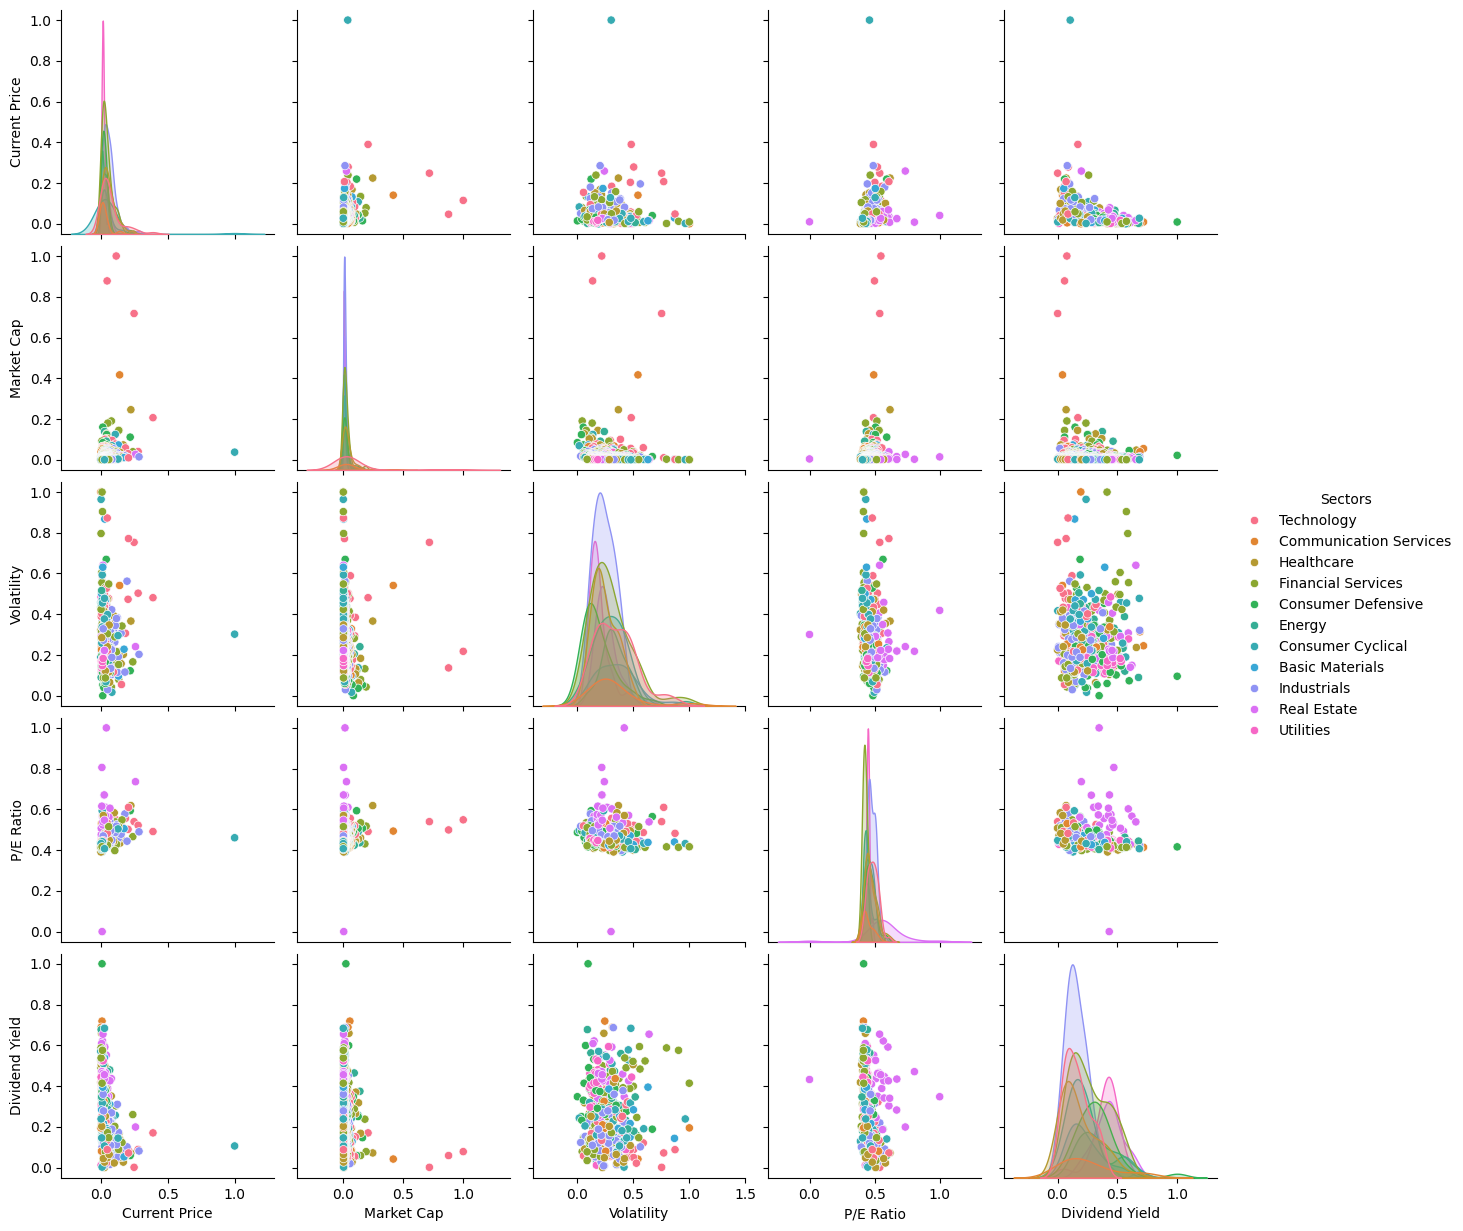

In [34]:
sns.pairplot(df,hue='Sectors')

In [35]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

<div class="alert alert-danger">
<b>Warning:</b> for some reason the heatmap is messed up during reruns, can whoever made this take a look
</div>

## idk... seems like it works for me even if I rerun it. is anyone else having the issue with corr. map? -will

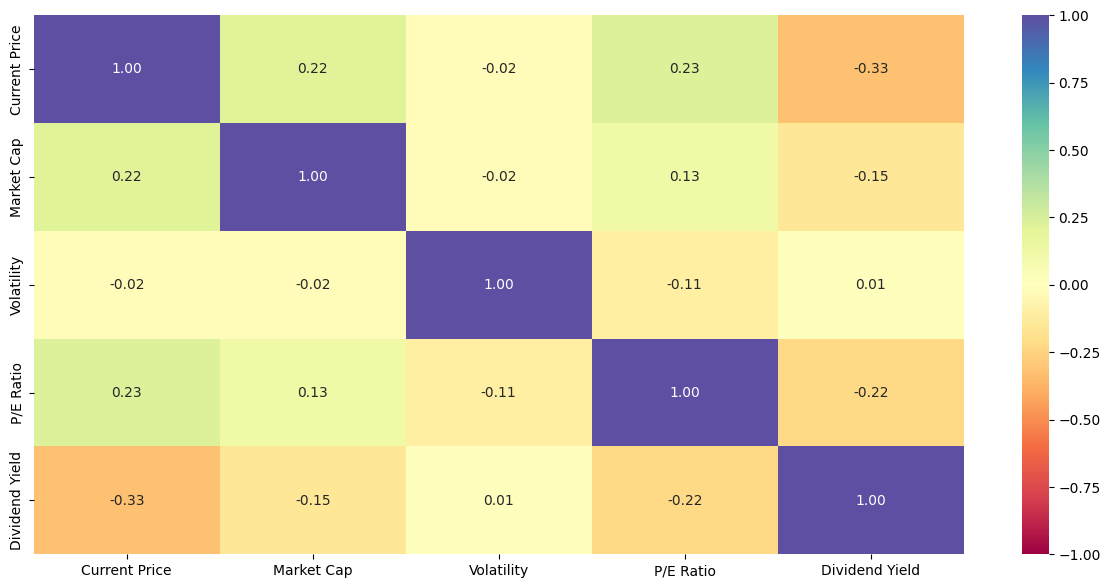

In [36]:
# check for correlations
# Important: Since normalization is a linear transformation, it doesn't affect correlation of the features, hence no need to run correlation map 
#with normalized data 

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


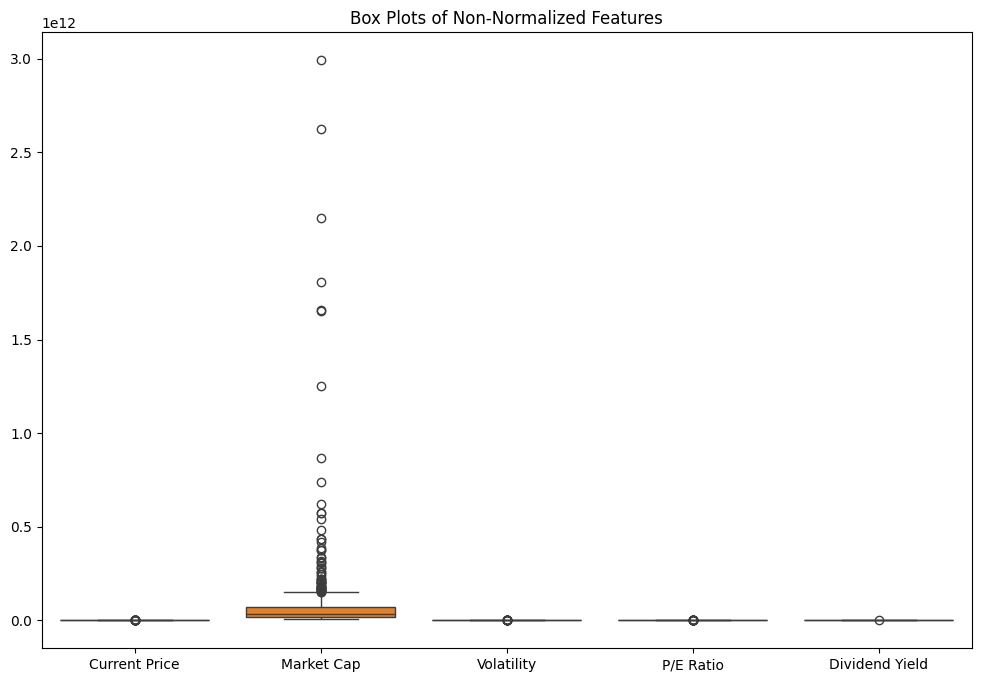

In [37]:
#box plot of not normalized data 
plt.figure(figsize=(12, 8))
sns.boxplot(data=sp_500[num_cols], orient='v')
plt.title('Box Plots of Non-Normalized Features')
plt.show()

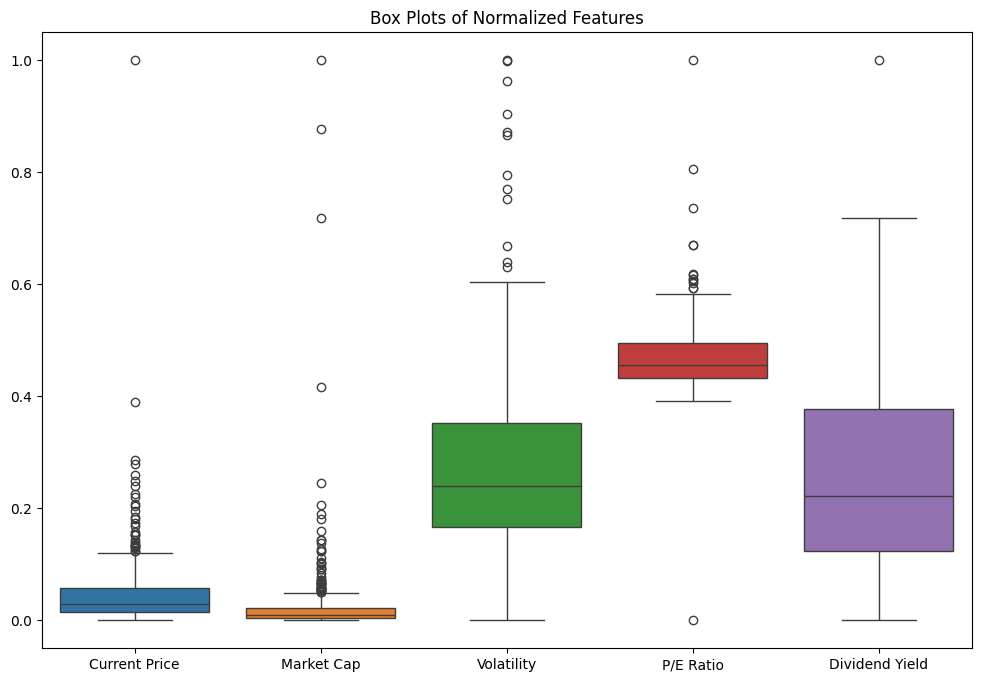

In [38]:
#box plot of normalized data 
plt.figure(figsize=(12, 8))
sns.boxplot(data= df[num_cols], orient='v')
plt.title('Box Plots of Normalized Features')
plt.show()

<div class="alert alert-danger">
<b>Warning:</b> non-normalized violin plot error 
</div>

## if you're getting error 'sp_500 is not defined' here it's becuase you need to run the first cell where we bring that huge dataset that's where the varaible is made -will

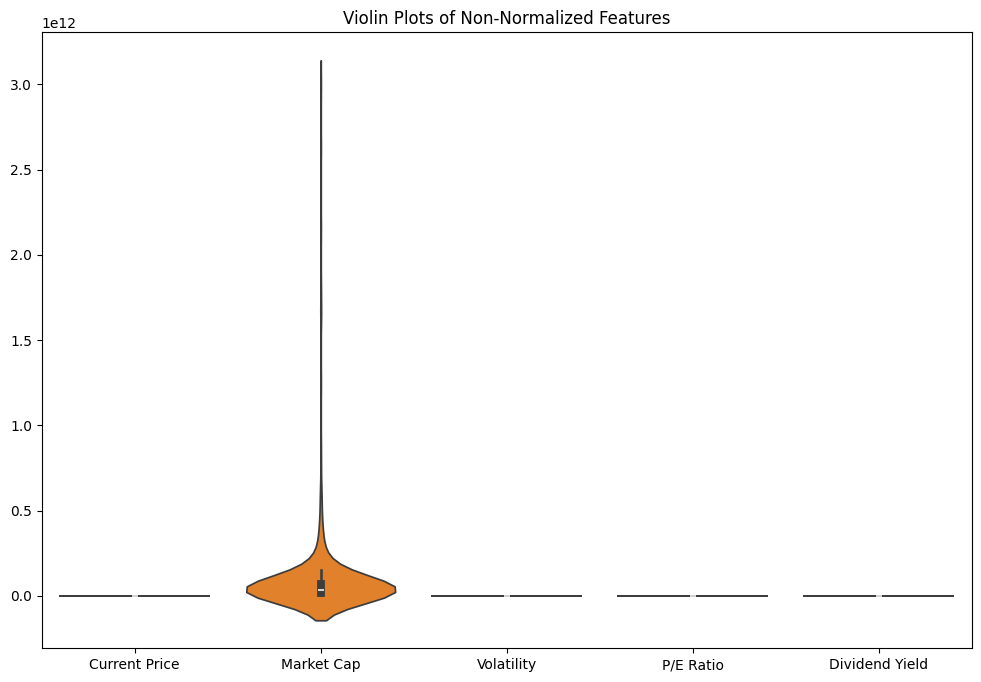

In [39]:
#Violin plot of anot normalized data 
plt.figure(figsize=(12, 8))
sns.violinplot(data = sp_500 , orient='v')
plt.title('Violin Plots of Non-Normalized Features')
plt.show()

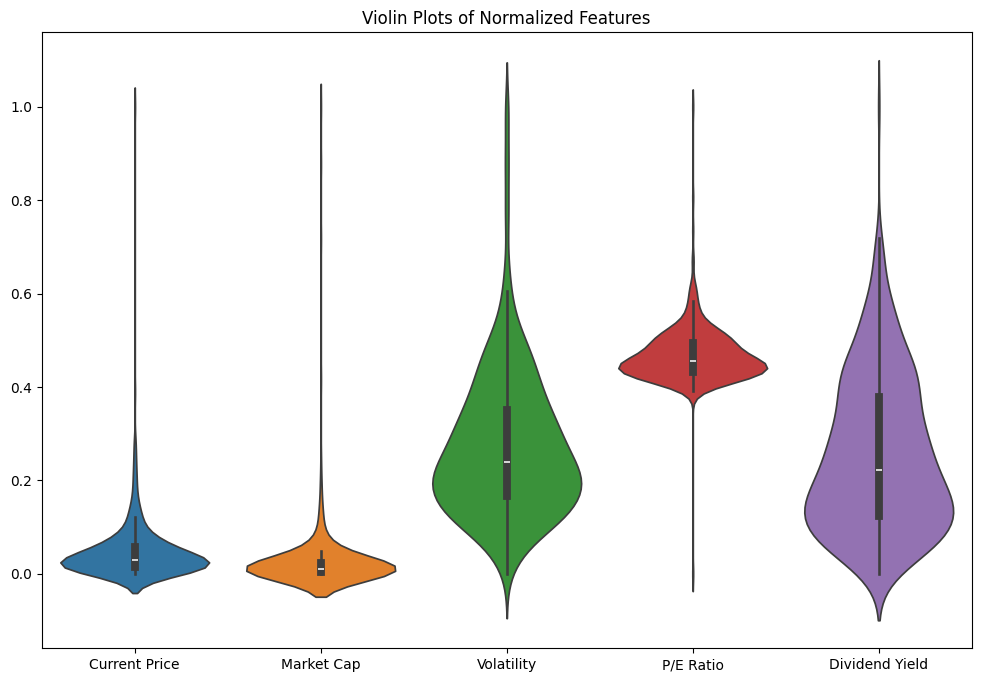

In [40]:
#Violin plot of normalized data 
plt.figure(figsize=(12, 8))
sns.violinplot(data= df , orient='v')
plt.title('Violin Plots of Normalized Features')
plt.show()

<div class="alert alert-danger">
<b>Warning:</b> same here something is missing
</div>

# idk what happened here maybe just a cell that checks df is normalized? -will

In [41]:
df

,Symbol,Sectors,Current Price,Market Cap,Volatility,P/E Ratio,Dividend Yield
0,MSFT,Technology,0.115016,1.000000,0.217684,0.548600,0.078075
1,AAPL,Technology,0.047047,0.877809,0.136364,0.499054,0.058824
2,NVDA,Technology,0.248597,0.717783,0.752602,0.539670,0.001070
3,META,Communication Services,0.140613,0.416624,0.541015,0.493398,0.041711
4,LLY,Healthcare,0.224613,0.245528,0.366207,0.618555,0.071658
...,...,...,...,...,...,...,...
400,HAS,Consumer Cyclical,0.012148,0.000470,0.455133,0.441071,0.577540
401,CMA,Financial Services,0.012443,0.000398,0.903397,0.413915,0.575401
402,VFC,Consumer Cyclical,0.001944,0.000173,0.963562,0.432062,0.238503
403,ZION,Financial Services,0.009289,0.000145,0.999295,0.416572,0.413904


# so the df is the normalized data one as it should be right? but when u go further more errors...

### i think jensen wrote this code below last time we met but I also ran it to error here saying 'normalized_features not define' so i changed it to df[num_cols] and was able to make it run. pls let me know if the code is not working as intended but thats the only thing i change and it seems to be working fine now to me -will

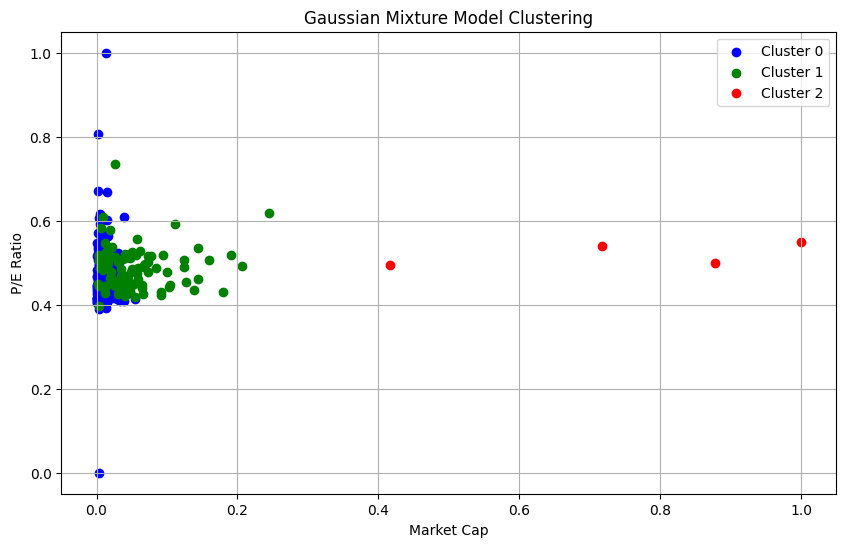

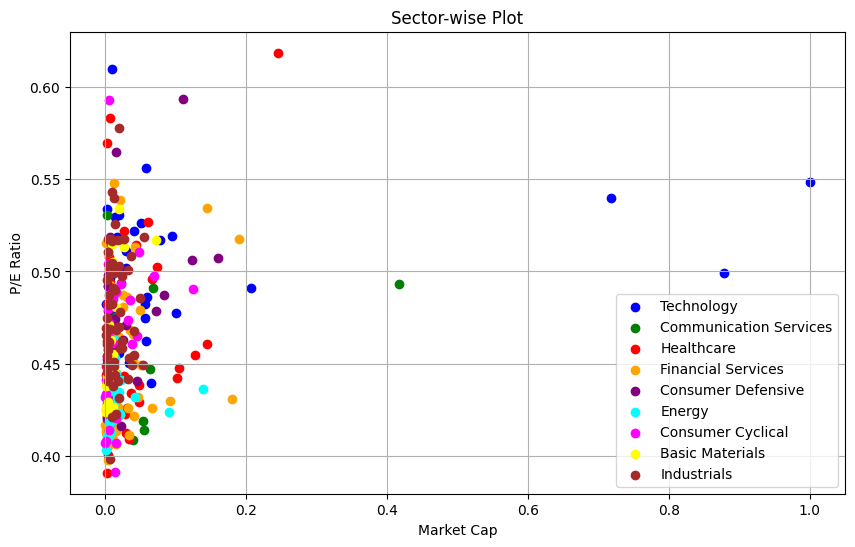

In [42]:


# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3, random_state=42)  # You can adjust n_components
clusters = gmm.fit_predict(df[num_cols])

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Plotting clusters
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']
for cluster_id, color in zip(range(3), colors):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Market Cap'], cluster_data['P/E Ratio'], c=color, label=f'Cluster {cluster_id}')

plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Market Cap')
plt.ylabel('P/E Ratio')
plt.legend()
plt.grid(True)
plt.show()

# Plotting each sector
plt.figure(figsize=(10, 6))
sectors = df['Sectors'].unique()
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown']
for sector, color in zip(sectors, colors):
    sector_data = df[df['Sectors'] == sector]
    plt.scatter(sector_data['Market Cap'], sector_data['P/E Ratio'], c=color, label=sector)

plt.title('Sector-wise Plot')
plt.xlabel('Market Cap')
plt.ylabel('P/E Ratio')
plt.legend()
plt.grid(True)
plt.show()

# DIMENSIONALITY REDUCTION

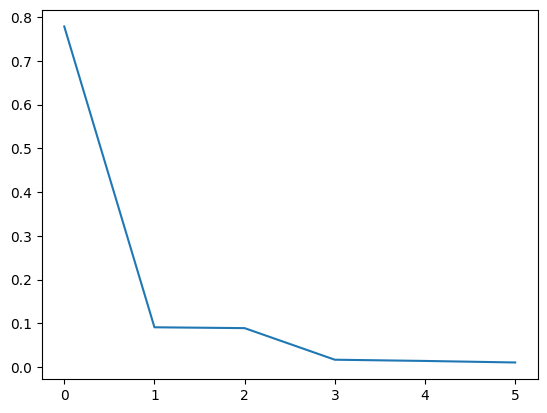

In [43]:
df_numeric = df.drop(columns=['Symbol', 'Sectors'])

pca = PCA()
principal_components = pca.fit_transform(df_numeric)

plt.plot(pca.explained_variance_ratio_)  

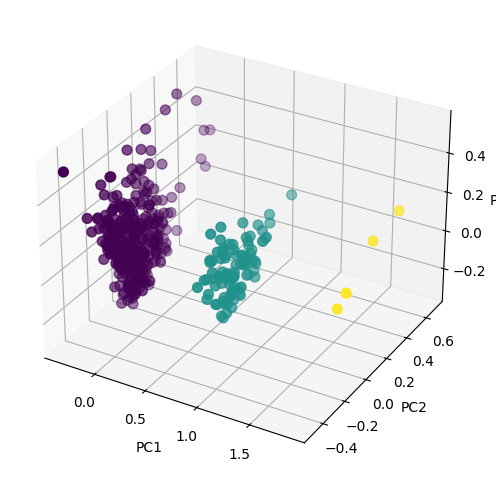

In [44]:
# Apply PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_numeric)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

#plot in 3d with sectors for hue
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'], c=df['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

---


starting over

# **New Analysis**
### **going to try to do some new analysis. once we fix above we can incorperate both together for our final project. will include as many notes and annotations as possible**

In [56]:
df_normalized = pd.read_csv('sp500_stock_data_cleaned_normalized.csv')

df_normalized


,Symbol,Sectors,Current Price,Market Cap,Volatility,P/E Ratio,Dividend Yield
0,MSFT,Technology,0.115016,1.000000,0.217684,0.548600,0.078075
1,AAPL,Technology,0.047047,0.877809,0.136364,0.499054,0.058824
2,NVDA,Technology,0.248597,0.717783,0.752602,0.539670,0.001070
3,META,Communication Services,0.140613,0.416624,0.541015,0.493398,0.041711
4,LLY,Healthcare,0.224613,0.245528,0.366207,0.618555,0.071658
...,...,...,...,...,...,...,...
400,HAS,Consumer Cyclical,0.012148,0.000470,0.455133,0.441071,0.577540
401,CMA,Financial Services,0.012443,0.000398,0.903397,0.413915,0.575401
402,VFC,Consumer Cyclical,0.001944,0.000173,0.963562,0.432062,0.238503
403,ZION,Financial Services,0.009289,0.000145,0.999295,0.416572,0.413904


c:\Users\adity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


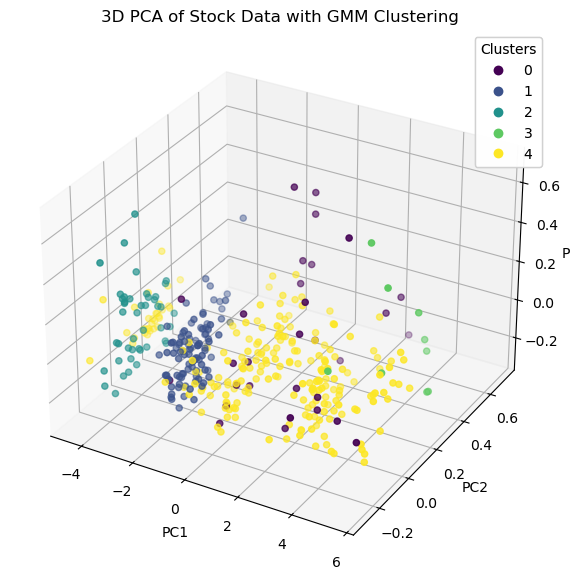

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

encoder = LabelEncoder()
df_normalized['Sectors_encoded'] = encoder.fit_transform(df_normalized['Sectors'])

features = ['Current Price', 'Market Cap', 'Volatility', 'P/E Ratio', 'Dividend Yield', 'Sectors_encoded']
X = df_normalized[features]

n_components = 5  
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(X)

clusters = gmm.predict(X)

df_normalized['Cluster'] = clusters

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_normalized['Cluster'], cmap='viridis', marker='o')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA of Stock Data with GMM Clustering')

plt.show()

The plot above visualizes the stock data reduced to three principal components (PC1, PC2, PC3) with the Gaussian Mixture Model (GMM) clustering represented in different colors. Each color represents a cluster identified by the GMM, suggesting groups of stocks that share similar characteristics based on their normalized current price, market cap, volatility, P/E ratio, dividend yield, and sector encoding.

There is seperation between the clusters, which indicates that the GMM has identified distinct groups within the stock data. However, the true value of these clusters depends on further analysis and interpretation to understand the characteristics that define each cluster, such as common sectors, similar market caps, or other shared features.
So now we need to:
- Analyze the cluster characteristics to determine the defining features of each cluster.
- Explore other unsupervised machine learning models for comparison or to find more insights.
- Create more vizzzz -  2D plots for pairs of features, to understand the data and clustering better.



# Lets see num of clusters

c:\Users\adity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\adity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\adity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\adity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

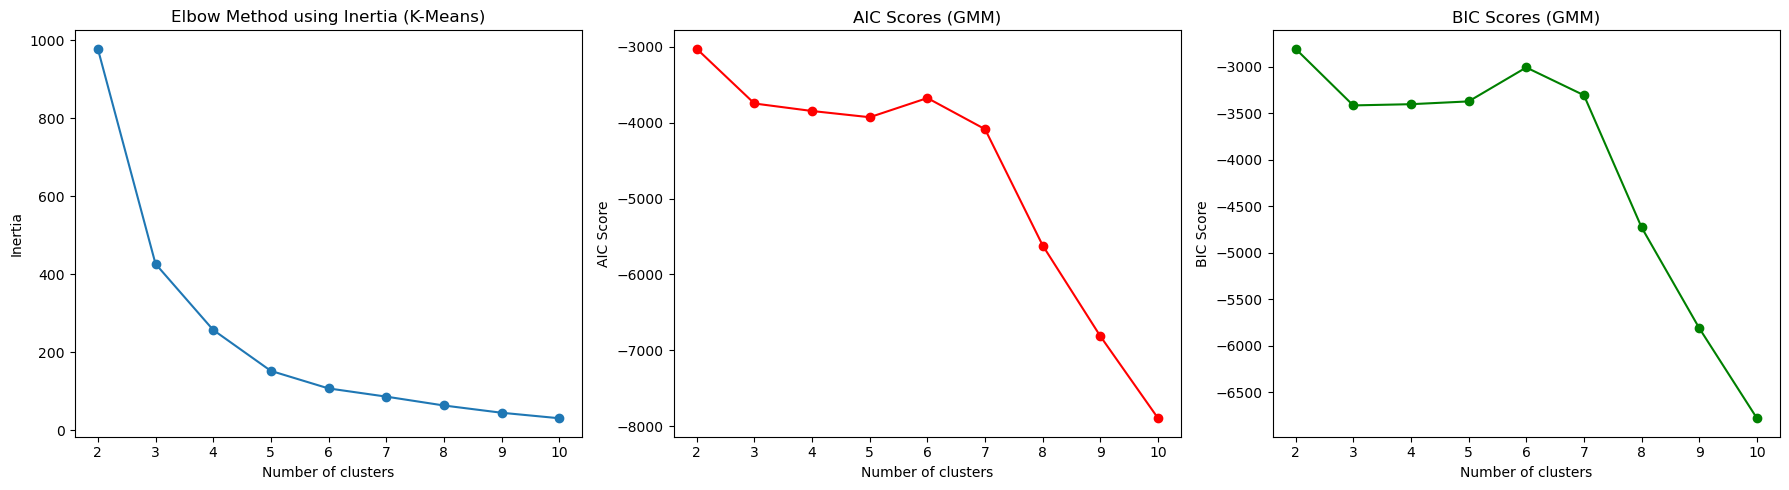

In [58]:
import numpy as np

n_clusters_range = range(2, 11)

inertia_scores = []

aic_scores = []
bic_scores = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)
    
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    gmm.fit(X)
    aic_scores.append(gmm.aic(X))
    bic_scores.append(gmm.bic(X))

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].plot(n_clusters_range, inertia_scores, marker='o')
ax[0].set_title('Elbow Method using Inertia (K-Means)')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')

ax[1].plot(n_clusters_range, aic_scores, marker='o', color='red')
ax[1].set_title('AIC Scores (GMM)')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('AIC Score')

ax[2].plot(n_clusters_range, bic_scores, marker='o', color='green')
ax[2].set_title('BIC Scores (GMM)')
ax[2].set_xlabel('Number of clusters')
ax[2].set_ylabel('BIC Score')

plt.tight_layout()
plt.show()


The explained_variance_ratio_ attribute is specifically associated with Principal Component Analysis (PCA), not directly with clustering models like Gaussian Mixture Models (GMM) or K-Means. In PCA, explained_variance_ratio_ indicates the proportion of the dataset's variance that lies along each principal component, which can help in choosing the number of components to keep.

The Elbow Method: This involves plotting the model's inertia (sum of squared distances of samples to their closest cluster center) or a score (like silhouette score) against the number of clusters. The "elbow" point, where the rate of decrease sharply changes, can suggest a good number of clusters.

The Silhouette Score: This measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. You can plot this score against the number of clusters to find the optimal number.

For GMM, additional criteria like the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC) can be used to select the number of clusters. These criteria balance model complexity and goodness of fit: the model that minimizes AIC or BIC is often preferred.




**best cluster size seems to be around 5**

In [62]:
optimal_clusters = 5

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans_clusters_optimal = kmeans_optimal.fit_predict(X)

gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=0)
gmm_optimal.fit(X)
gmm_clusters_optimal = gmm_optimal.predict(X)

df_normalized['Cluster_GMM_Optimal'] = gmm_clusters_optimal
df_normalized['Cluster_KMeans_Optimal'] = kmeans_clusters_optimal

numeric_cols = df_normalized.select_dtypes(include=[np.number]).columns

cluster_characteristics_gmm_numeric = df_normalized.groupby('Cluster_GMM_Optimal')[numeric_cols].mean()
cluster_characteristics_kmeans_numeric = df_normalized.groupby('Cluster_KMeans_Optimal')[numeric_cols].mean()

display(cluster_characteristics_gmm_numeric)
(cluster_characteristics_kmeans_numeric)



c:\Users\adity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\adity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\adity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Current Price,Market Cap,Volatility,P/E Ratio,Dividend Yield,Sectors_encoded,Cluster,Cluster_GMM_Optimal,Cluster_KMeans_Optimal
Cluster_GMM_Optimal,,,,,,,,,
0,0.097213,0.009288,0.406227,0.468558,0.306738,3.833333,0.0,0.0,2.266667
1,0.053387,0.010907,0.259643,0.505190,0.213302,7.114583,1.0,1.0,1.500000
2,0.071307,0.087011,0.342026,0.485672,0.163758,9.000000,2.0,2.0,2.000000
3,0.027285,0.061221,0.493966,0.439224,0.378847,0.444444,3.0,3.0,3.000000
4,0.034445,0.024834,0.242638,0.451063,0.278676,4.570796,4.0,4.0,2.349558


,Current Price,Market Cap,Volatility,P/E Ratio,Dividend Yield,Sectors_encoded,Cluster,Cluster_GMM_Optimal,Cluster_KMeans_Optimal
Cluster_KMeans_Optimal,,,,,,,,,
0,0.044593,0.019727,0.252965,0.462720,0.274909,2.466667,3.413333,3.413333,0.0
1,0.054157,0.013547,0.247530,0.503862,0.243804,7.301075,1.333333,1.333333,1.0
2,0.049180,0.055182,0.281820,0.470062,0.257378,9.405405,2.810811,2.810811,2.0
3,0.036919,0.028202,0.339736,0.455488,0.240306,0.371429,3.514286,3.514286,3.0
4,0.046068,0.027404,0.286762,0.449436,0.254111,5.140625,3.156250,3.156250,4.0


gmm:the clusters show distinct profiles, for example, cluster 0 and cluster 3 exhibit higher volatility and dividend yield, indicating they might consist of stocks that are riskier but offer higher potential returns.
knn:some clusters are characterized by higher average market cap or lower volatility, indicating a potential grouping of more stable, large-cap stocks in certain clusters.


visualizations that can highlight the differences between clusters according to key financial metrics:

Market Cap vs. Volatility: This can show if larger companies tend to be less volatile than smaller companies, as often assumed.
P/E Ratio vs. Dividend Yield: This might reveal if companies with higher dividends tend to have lower or higher P/E ratios, indicating their growth potential and income-generating capability.


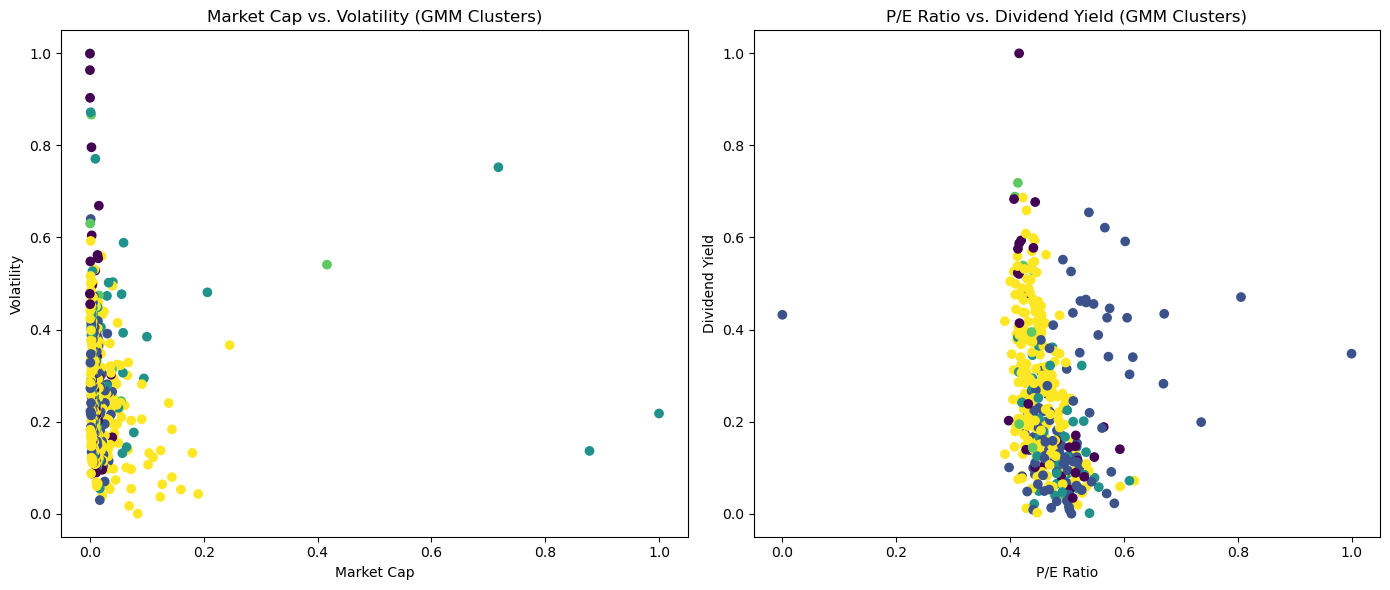

(-0.05253960516060212, 0.5954369039825097)

In [63]:
from sklearn.metrics import silhouette_score

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(df_normalized['Market Cap'], df_normalized['Volatility'], c=df_normalized['Cluster_GMM_Optimal'], cmap='viridis')
ax[0].set_title('Market Cap vs. Volatility (GMM Clusters)')
ax[0].set_xlabel('Market Cap')
ax[0].set_ylabel('Volatility')

ax[1].scatter(df_normalized['P/E Ratio'], df_normalized['Dividend Yield'], c=df_normalized['Cluster_GMM_Optimal'], cmap='viridis')
ax[1].set_title('P/E Ratio vs. Dividend Yield (GMM Clusters)')
ax[1].set_xlabel('P/E Ratio')
ax[1].set_ylabel('Dividend Yield')

plt.tight_layout()
plt.show()

silhouette_score_gmm = silhouette_score(X, gmm_clusters_optimal)
silhouette_score_kmeans = silhouette_score(X, kmeans_clusters_optimal)

silhouette_score_gmm, silhouette_score_kmeans


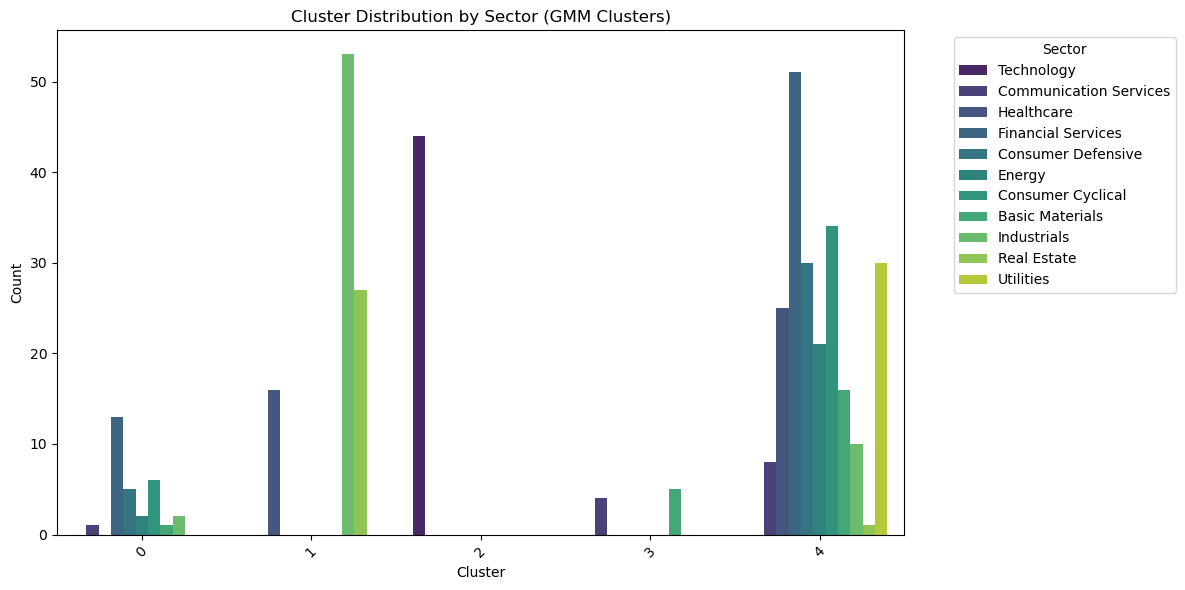

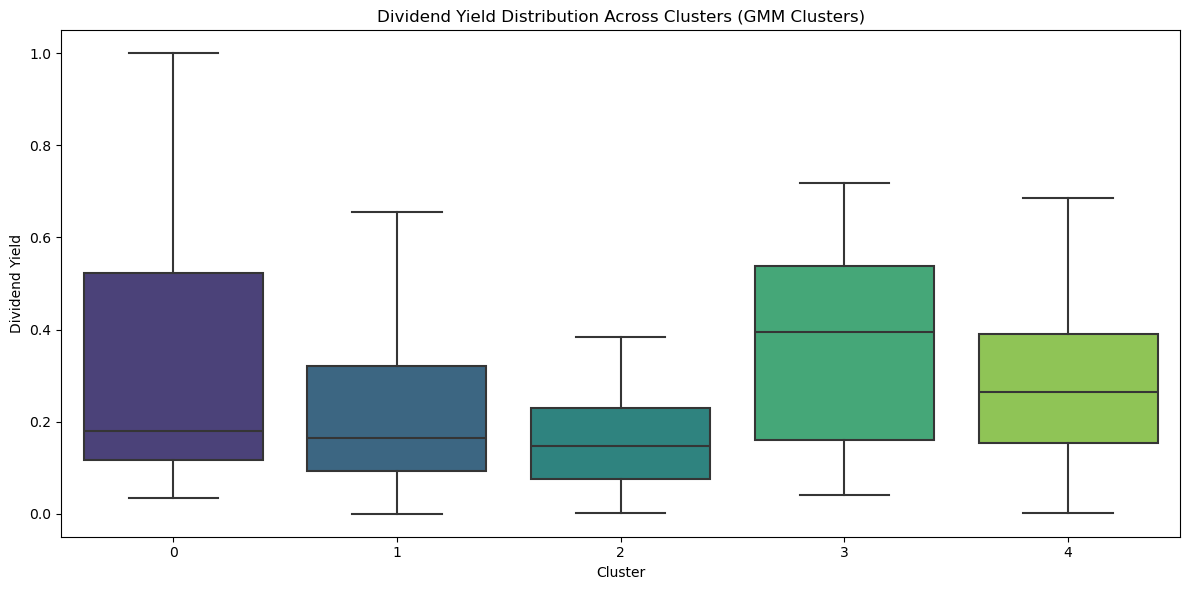

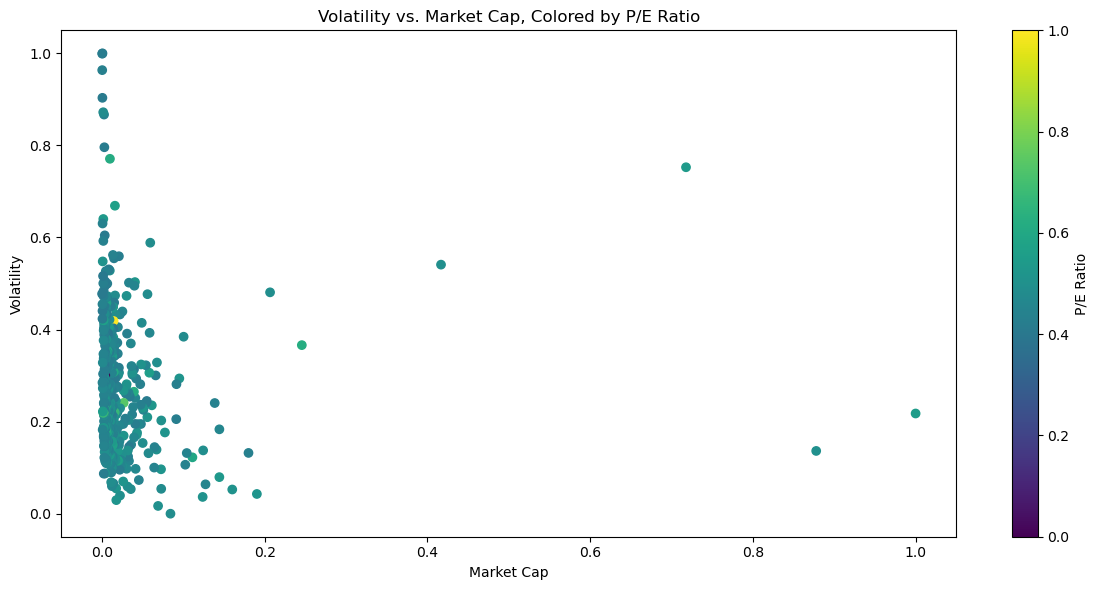

In [64]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df_normalized, x='Cluster_GMM_Optimal', hue='Sectors', palette='viridis')
plt.title('Cluster Distribution by Sector (GMM Clusters)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster_GMM_Optimal', y='Dividend Yield', data=df_normalized, palette='viridis')
plt.title('Dividend Yield Distribution Across Clusters (GMM Clusters)')
plt.xlabel('Cluster')
plt.ylabel('Dividend Yield')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
scatter = plt.scatter(df_normalized['Market Cap'], df_normalized['Volatility'], c=df_normalized['P/E Ratio'], cmap='viridis')
plt.colorbar(scatter, label='P/E Ratio')
plt.title('Volatility vs. Market Cap, Colored by P/E Ratio')
plt.xlabel('Market Cap')
plt.ylabel('Volatility')
plt.tight_layout()
plt.show()


# Results (findings)
sector influences: certain sectors tend to cluster together, indicating similar financial profiles or market perceptions that can be significant for sector-specific analysis or investment strategies.  
income vs. growth: the analysis of dividend yields and p/e ratios across clusters highlighted differences between income-generating stocks and those potentially offering growth opportunities.  
company size and stability: larger companies (higher market cap) generally showed lower volatility, a common assumption validated through our visualizations.


what i want to do more:  
proper write ups for each section  
more visualizations points and a better 'story' cuz before we had no narrative w the analysis   
more analysis points?  
try with KNN?  


# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
